In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [56]:
#Read the data file and separate the data into features and labels
data = pd.read_csv('input/train.csv')

data.drop(['id'], axis=1, inplace=True)

labels = data['target']
features = data.drop(['target'], axis=1)

print('Dataset has {} datapoints with {} features'.format(*features.shape))

Dataset has 61878 datapoints with 93 features


In [57]:
#Label Encoder
le = LabelEncoder()
labels = le.fit_transform(labels)
labels.size

61878

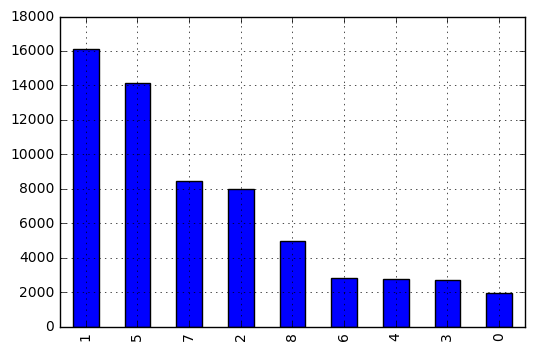

In [58]:
pd.Series(labels).value_counts().plot(kind='bar', grid=True)

In [59]:
#Train and testing data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=30)


In [60]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [61]:
y_pred=tree_clf.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.71565934065934067

In [66]:
gb_clf = GradientBoostingClassifier(random_state=70)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7862798965740142